# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### Цель исследования 

Провести исследовательский анализ данных, чтобы установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему для остлеживания аномалий и мошеннической деятельности. 

#### Вопросы исследования 


#### Ход исследования 

1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки 
6. Проверка гипотез


## Открытие файла и изучение данных

In [1]:
# импортируем необходимые для работы бибилиотеки 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# чтение файла и сохранение данных в переменную df

try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
# выводим для просмотра информацию о таблице в случайном порядке 

pd.set_option('display.max_columns', None)
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21389,6,3770000.0,45.0,2015-04-21T00:00:00,2,2.6,9.0,27.0,2,False,False,False,7.0,0.0,Санкт-Петербург,22882.0,12503.0,0.0,NaN,0.0,NaN,707.0
13224,8,16900000.0,170.0,2019-03-27T00:00:00,6,4.5,4.0,115.5,4,NaN,False,False,16.0,NaN,Санкт-Петербург,26619.0,5579.0,0.0,NaN,1.0,281.0,NaN
3149,7,4650000.0,55.0,2016-02-08T00:00:00,2,NaN,15.0,28.0,1,NaN,False,False,12.0,1.0,Санкт-Петербург,27666.0,9479.0,1.0,637.0,0.0,NaN,166.0
8875,10,1350000.0,58.0,2017-07-27T00:00:00,2,NaN,9.0,29.0,1,NaN,False,False,8.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,416.0
2453,18,5299000.0,60.0,2018-10-24T00:00:00,3,NaN,5.0,NaN,4,NaN,False,False,6.0,NaN,Санкт-Петербург,21058.0,15432.0,1.0,732.0,1.0,118.0,NaN
9153,8,4850000.0,55.5,2015-04-06T00:00:00,3,NaN,5.0,40.0,5,NaN,False,False,5.0,0.0,Санкт-Петербург,40230.0,11933.0,2.0,388.0,0.0,NaN,700.0
630,20,3700000.0,59.6,2018-07-19T00:00:00,3,2.5,9.0,38.0,7,NaN,False,False,8.0,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20729,13,5395000.0,40.4,2018-02-01T00:00:00,1,2.6,17.0,20.2,14,NaN,False,False,10.7,2.0,Санкт-Петербург,34273.0,15372.0,1.0,518.0,3.0,491.0,36.0
16431,13,3799000.0,31.0,2018-04-12T00:00:00,1,2.6,5.0,6.0,1,NaN,False,False,17.0,NaN,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0
1371,9,8000000.0,92.0,2019-04-01T00:00:00,3,3.4,5.0,52.7,4,NaN,False,False,11.5,NaN,Санкт-Петербург,23486.0,3027.0,0.0,NaN,0.0,NaN,NaN


In [4]:
# выводим общую информацию о данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице двадцать два столбца, есть пропуски в данных и несоответсвия в типе данных:  

first_day_exposition - типа данных object, а должен быть datetime;

ceiling_height - нулевые значения;

floors_total - должен быть тип int, ведь количество этажей целое значение, нулевые значения;

is_apartment - должен быть тип bool, нулевые значения;

living_area - нулевые значения;

kitchen_area - нулевые значения;

balcony - нулевые значения;

locality_name - нулевые значения + из задания мы знаем, что есть дубликаты явные и неявные;

airports_nearest - нулевые значения;

cityCenters_nearest - нулевые значения;

parks_around3000 - тип должен быть int, нулевые значения;

parks_nearest - нулевые значения;

ponds_around3000 - тип должен быть int, нулевые значения;

ponds_nearest - нулевые значения;

days_exposition - тип должен быть int, нулевые значения.


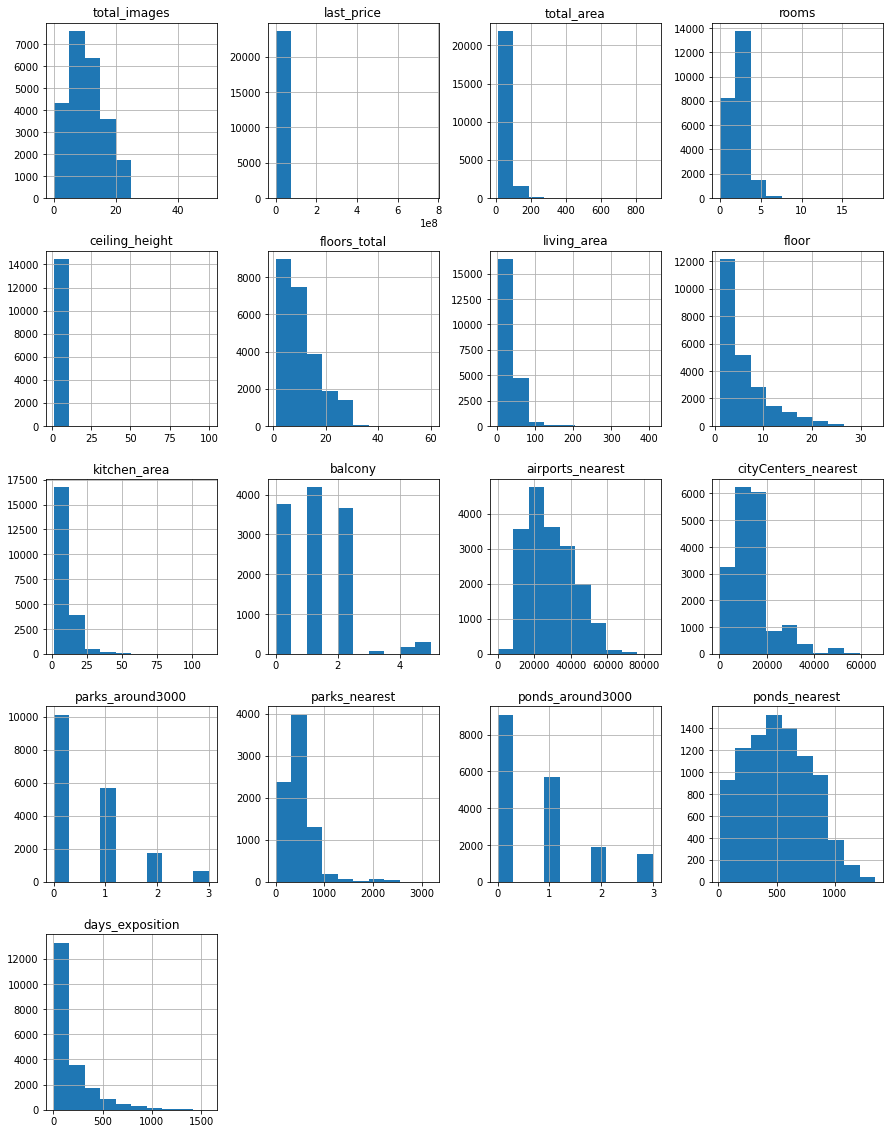

In [5]:
# Строим гистограмму для всех числовых столбцов таблицы на одном графике

df.hist(figsize=(15, 20));

**Промежуточный вывод**

На графиках видно, что наибольший интерес, с точки зрения обработки данных, представляют столбцы last_price, rooms, ceiling_height,total_area, kitchen_area, living_area, так большинство данных сосредоточены в левой части графиков. Это может говорить об аномалиях в данных, некорректном типе данных или о пропущенных значениях.  

## Предобработка данных

In [6]:
# посмотрим количество пропущенных значений в каждом столбце 

df.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [7]:
# посмотрим процентное соотношение, чтобы понимать наиболее критические области с пропусками 
df.isnull().sum().sort_values()/df.shape[0]*100

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

In [8]:
# Начнем с приведения названия столбцов к единому стилю 

df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                        'parks_around3000': 'parks_around_3000', 
                        'ponds_around3000': 'ponds_around_3000',
                        'studio': 'is_studio',
                        'open_plan': 'is_open_plan'
                       })
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Столбец first_day_exposition 

In [9]:
# Изменим формат даты на дату без времени, так как времени мы не знаем

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

df.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [10]:
# Посмотрим на первое и последнее объявление в датасете 

display(df['first_day_exposition'].min(), df['first_day_exposition'].max())

Timestamp('2014-11-27 00:00:00')

Timestamp('2019-05-03 00:00:00')

**Промежуточный вывод**

Теперь мы знаем, что в датасете находятся объявления с ноября 2014 года по май 2019 года. Можно посмотреть на то, как распределены объявления

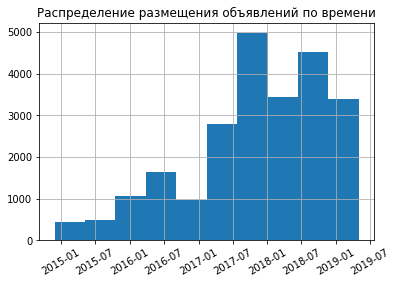

In [11]:
plt.hist(df['first_day_exposition'])
plt.grid()
plt.xticks(rotation=30)
plt.title('Распределение размещения объявлений по времени')
plt.show()

**Промежуточный вывод**

Благодаря графику мы видим, что рост размещения объявлений о продаже начался с февраля 2017 года. 

### Столбец days_exposition

In [12]:
# Изменим тип данных на целочисленный

df['days_exposition'] = np.floor(pd.to_numeric(df['days_exposition'], errors='coerce')).astype('Int64')

### Столбец ceiling_height

In [13]:
# Из обзора данных мы помним, что пропусков в этом столбце 9195. Заменим их медианой 

df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


In [14]:
# Теперь посмотрим на аномальнве значения 

df.loc[(df['ceiling_height'] > 5) | (df['ceiling_height'] < 2)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.00,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259
464,15,66571000.0,280.3,2015-06-11,6,5.20,8.0,159.5,7,NaN,False,False,21.10,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3.0,190.0,3,NaN,False,False,63.00,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,<NA>
1388,20,59800000.0,399.0,2015-01-21,5,5.60,6.0,NaN,6,NaN,False,False,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719
3148,14,2900000.0,75.0,2018-11-12,3,32.00,3.0,53.0,2,NaN,False,False,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
3474,3,1400000.0,30.0,2018-03-16,1,8.00,5.0,15.3,2,False,False,False,7.30,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125
4643,0,4300000.0,45.0,2018-02-01,2,25.00,9.0,30.0,2,NaN,False,False,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181
4876,7,3000000.0,25.0,2017-09-27,0,27.00,25.0,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28
5076,0,3850000.0,30.5,2018-10-03,1,24.00,5.0,19.5,1,True,False,False,5.50,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7
5246,0,2500000.0,54.0,2017-10-13,2,27.00,5.0,30.0,3,NaN,False,False,9.00,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540


In [15]:
# Заменим аномальные значения медианой

df.loc[(df['ceiling_height'] > 5) | (df['ceiling_height'] < 2), 'ceiling_height'] = df['ceiling_height'].median()

In [16]:
# Проверим, что аномалий не осталось

df['ceiling_height'].max()

5.0

### Столбец is_apartment

In [17]:
# Пропуски в этом столбце можно заменить по логике "Если не указано, что это апартаменты, то это не они", то есть сделать так, чтобы на месте пропуска было False 

df['is_apartment'] = df['is_apartment'].fillna(False).astype('bool')    
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

### Столбец balcony

In [18]:
# Посмотрим на данные в столбце 

df['balcony'].isna().sum()

11519

In [19]:
df['balcony'].describe().round(2)

count    12180.00
mean         1.15
std          1.07
min          0.00
25%          0.00
50%          1.00
75%          2.00
max          5.00
Name: balcony, dtype: float64

In [20]:
# Пропуски в данном столбце можно замненить на 0, основываясь на предположении, что если в объявлении не указано число балконов, значит их нет. 
# Также разумно было бы привести тип данных к целочисленному формату. 

df['balcony'] = df['balcony'].fillna(0).astype('int')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


### Столбец locality_name

In [21]:
df['locality_name'].value_counts()

Санкт-Петербург           15721
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
деревня Нижние Осельки        1
поселок Каложицы              1
деревня Трубников Бор         1
поселок Ромашки               1
поселок Коммунары             1
Name: locality_name, Length: 364, dtype: int64

In [22]:
# Посчитаем количество строк, где пропущен населенный пункт 

df.locality_name.isnull().sum()

49

In [23]:
# Посмотрим на строки, где населенный пункт не указан 

df[df.locality_name.isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15,3,3.55,5.0,50.8,2,False,False,False,8.8,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147
2033,6,5398000.0,80.0,2017-05-30,3,2.65,4.0,42.6,2,False,False,False,18.6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
2603,20,3351765.0,42.7,2015-09-20,1,2.65,24.0,15.6,3,False,False,False,10.7,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276
2632,2,5130593.0,62.4,2015-10-11,2,2.65,24.0,33.1,21,False,False,False,8.2,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256
3574,10,4200000.0,46.5,2016-05-28,2,2.65,5.0,30.8,5,False,False,False,6.5,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45


In [24]:
# Избавимся от объектов без названия  

df= df.dropna(subset=['locality_name'])   

In [25]:
# Избавимся от дубликатов 

df['locality_name'] = (
    df['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'коттеджный поселок', 'городской поселок', 'поселок станции'], 'поселок', regex=True)
) 

df['locality_name'].value_counts()

Санкт-Петербург                                      15721
поселок Мурино                                         556
поселок Шушары                                         440
Всеволожск                                             398
Пушкин                                                 369
                                                     ...  
деревня Лупполово                                        1
поселок Рабитицы                                         1
поселок при железнодорожной станции Приветнинское        1
поселок Лужайка                                          1
поселок Коммунары                                        1
Name: locality_name, Length: 320, dtype: int64

#### Столбцы ponds_around_3000, ponds_nearest, parks_around_3000, parks_nearest, city_centers_nearest, airports_nearest

**Промежуточный вывод**

Поскольку данные в этих столбцах заполняются без участия пользователя и получены из геосервисов, то оставляем их как есть. 

## Рассчеты и добавление новых столбцов

### Цена одного квадратного метра 

In [26]:
df['price_to_m'] = (df['last_price'] / df['total_area']).round(2)

In [27]:
df['price_to_m'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_to_m, dtype: float64

### День недели публикации объявления

In [28]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday    
df['month_exposition'] = df['first_day_exposition'].dt.month    
df['year_exposition'] = df['first_day_exposition'].dt.year 

In [29]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_to_m,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018


### Тип этажа квартиры 

In [30]:
def floors_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [31]:
df['floors_type'] = df.apply(floors_type, axis=1)

In [32]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_to_m,weekday_exposition,month_exposition,year_exposition,floors_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018,другой


### Расстояние до центра города

In [33]:
df['city_centers_nearest'] = df['city_centers_nearest']/1000

In [34]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_to_m,weekday_exposition,month_exposition,year_exposition,floors_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16.028,1.0,482.0,2.0,755.0,<NA>,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18.603,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13.933,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6.800,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8.098,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018,другой


## Исследовательский анализ данных

### Изучение параметров объектов: общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего парка

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

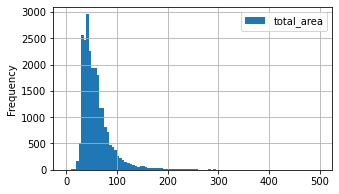

In [35]:
# Общая площадь 

df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
df['total_area'].describe()

**Промежуточный вывод**

В выборке есть объявления о продаже квартир площадью от 12м до 900м. Получается, медианный размер квартиры в продаже - 52м, благодаря среднему мы можем сказать, что чаще всего в продаже встречаются квартиры в 60м 

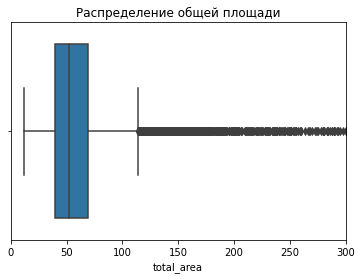

In [36]:
sns.boxplot(x='total_area', data=df)
plt.title('Распределение общей площади', fontsize= 12)
plt.xlim(0,300)
plt.show()

**Промежуточный вывод**

Редкие значения начинаются примерно с 200 метров

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

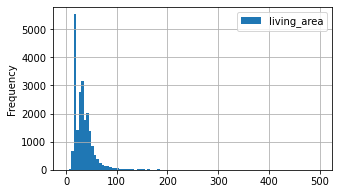

In [37]:
# Жилая площадь

df.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
df['living_area'].describe()

**Промежуточный вывод**

В среднем, размер жилой площади в квартирах - 34 метра. 

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

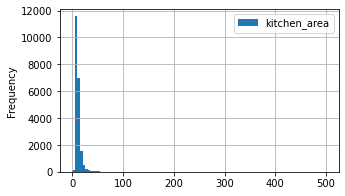

In [38]:
# Площадь кухни

df.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
df['kitchen_area'].describe()

**Промежуточный вывод**

Средний размер кухни - 10м. Можно сказать, что это соответсвует реальности - кухни в квартирах небольшие. 

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

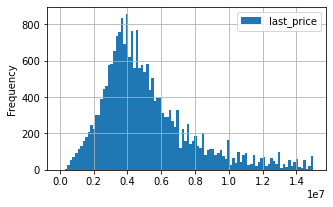

In [39]:
# Цена объекта 
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
df['last_price'].describe()

**Промежуточный вывод**

Видно, что минимальная цена квартиры 12 тысяч, а максимальная 763 миллиона. Так же видно, что максимальная цена очень сильно отличается от третьего квартиля. 

In [40]:
# Посмотрим на минимальное значение 

df[df['last_price'] < 100000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_to_m,weekday_exposition,month_exposition,year_exposition,floors_type
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9.176,1.0,805.0,0.0,NaN,8,111.83,2,3,2019,последний


In [41]:
# Посмотрим на максимальное значение 

df[df['last_price'] > 500000000] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_to_m,weekday_exposition,month_exposition,year_exposition,floors_type
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10.0,250.0,10,False,False,False,NaN,2,Санкт-Петербург,25108.0,3.956,1.0,530.0,3.0,756.0,33,1907500.0,5,9,2017,последний


**Промежуточный вывод**

По итогу мы имеем одно значение минимальной цены и одно значение максимальной, которые сильно отличаются от межквартильного размаха. Может быть это ошибка ввода, а может и нет. Лучше не гадать и избавиться от обоих  

In [42]:
df = df.loc[df['last_price'] > 100000] 

In [43]:
df = df.loc[df['last_price'] < 500000000] 

count    23648.000000
mean         6.509415
std          9.723163
min          0.430000
25%          3.400000
50%          4.650000
75%          6.799000
max        420.000000
Name: last_price, dtype: float64

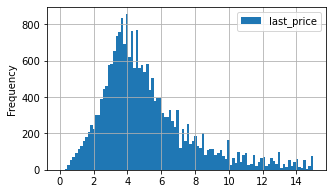

In [44]:
# Приведем данные в столбце к миллионам, заодно посмотрим корректно ли избавились от минимальной и максимальной стоимости

df['last_price'] = df['last_price'] / 1000000
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15), figsize = (5,3))
df['last_price'].describe()

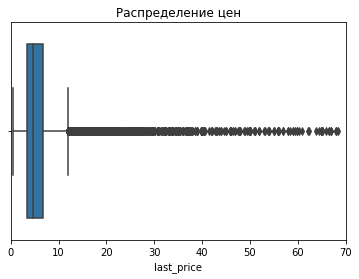

In [45]:
# Посмотрим на аномалии в данных 

sns.boxplot(x='last_price', data=df)
plt.title('Распределение цен', fontsize= 12)
plt.xlim(0,70)
plt.show()

**Промежуточный вывод**

Видно, что начиная где-то с цены в 30 миллионов значения встречаются реже 

Средняя цена квартиры в Санкт-Петербурге около 6,5 млн руб, однако это число сильно отличается от медианнной цены в 4,65 млн. Причиной тому может быть большое количество дорогих квартир. 

count    23648.000000
mean         2.069900
std          1.078189
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

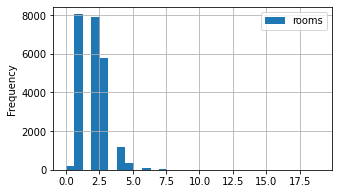

In [46]:
# Количество комнат

df.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
df['rooms'].describe()

**Промежуточный вывод**

На рынке можно найти как однокомнатные квартиры, так и девятнадцатикомнатные. Однако, больше всего предложений среди однокомнатных квартир. 

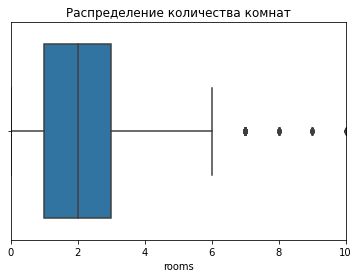

In [47]:
sns.boxplot(x='rooms', data=df)
plt.title('Распределение количества комнат', fontsize= 12)
plt.xlim(0,10)
plt.show()

**Промежуточный вывод**

Выбросы можно считать с 6 комнат

count    23648.000000
mean         2.695938
std          0.215425
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

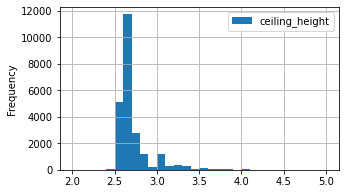

In [48]:
# Высота потолков

df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
df['ceiling_height'].describe()

**Промежуточный вывод**

Большинство квартир имеют высоту потолка в 2,7 метра, однако есть и нестандартные предложения с высотой потолков до 5 метров. 

In [49]:
# Тип этажа квартиры («первый», «последний», «другой»)

df['floors_type'].value_counts()

другой       17408
последний     3328
первый        2912
Name: floors_type, dtype: int64

**Промежуточный вывод**

Большинство квартир находятся между первым и последним этажом. 

count    23648.000000
mean         5.892295
std          4.881870
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

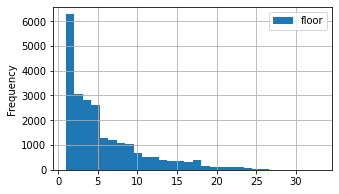

In [50]:
# Общее количество этажей в доме

df.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
df['floor'].describe()

**Промежуточный вывод**

Поскольку среднее в этом показетеле 5 этажей, то можно предположить, что большинство квартир в продаже в пятиэтажках. 

count    18137.000000
mean        14.198702
std          8.606888
min          0.181000
25%          9.241000
50%         13.107000
75%         16.293000
max         65.968000
Name: city_centers_nearest, dtype: float64

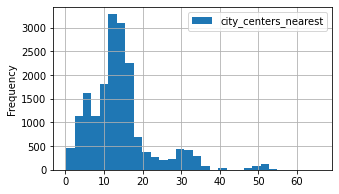

In [51]:
# Расстояние до центра города в метрах

df.plot(y = 'city_centers_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
df['city_centers_nearest'].describe()

**Промежуточный вывод**

Большинство квартир находятся в пределах 10-20 км от центра города, немало преложений и в радиусе 10км. В среднем, квартира находится на расстоянии 14 км от центра.

count    8062.000000
mean      490.786902
std       342.578728
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

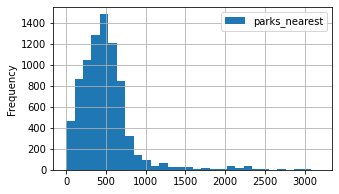

In [52]:
# Расстояние до ближайшего парка

df.plot(y = 'parks_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
df['parks_nearest'].describe()


**Промежуточный вывод**

В среднем парк находится на расстоянии 490 метров, можно сказать также, что немало квартир, где рядом есть парк.

Уберем выбросы в столбцах со стоимостью квартиры, комнатами и общей площадью 

In [53]:
df = df.query('last_price < 20 & rooms < 6 & total_area < 200')

### Скорость продажи квартир

count    19871.000000
mean       177.320769
std        216.028914
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

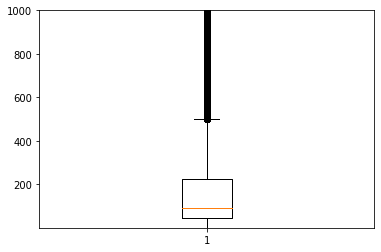

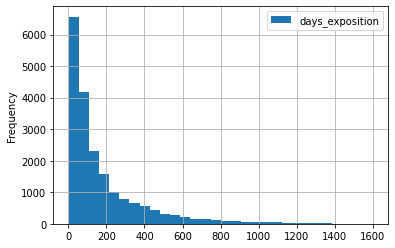

In [54]:
plt.boxplot(df[df['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))

#среднее значение, медиана и межквартильный размах
df[df['days_exposition']!=0]['days_exposition'].describe()


**Промежуточный вывод**

В среднем квартира продается за 180 дней. Однако есть и объекты, которые продавались более 4 лет. Быстрыми продажами можно считать те, что укладываются в срок совпадающей с медианой - 95 дней, все что находится после третьего квартиля 230 дней можно считать необычно долгими продажами. 

### Факторы влияющие на общую стоимость объекта 

In [55]:
# Построим матрицу диаграмм рассеяния, чтобы выявить корреляцию 
# Столбцы отвечающие день, месяц, год размещения рассмотрим отдельно, как и floors_type

corr = df[['last_price',\
           'total_area',\
           'living_area',\
           'kitchen_area',\
           'rooms']].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.770169,0.654020,0.575173,0.488490
total_area,0.770169,1.000000,0.919342,0.521534,0.791430
living_area,0.654020,0.919342,1.000000,0.262663,0.876787
kitchen_area,0.575173,0.521534,0.262663,1.000000,0.141801
rooms,0.488490,0.791430,0.876787,0.141801,1.000000


**Промежуточный вывод**

Видно, что набольшее влияние на цену оказывает общий метраж квартиры и связанные с ним столбцы (жилая площадь, площадь кухни). Наименьшая зависимость с количеством комнат. Возможно, это можно объяснить тем, что в любой квартире можно сделать перепланировку, поэтому количество комнат не так влияет на цену. 

In [56]:
#Этаж на котором расположена квартира

df.pivot_table(index='floors_type',values='last_price',  aggfunc='median').reset_index()

,floors_type,last_price
0,другой,4.7100
1,первый,3.8825
2,последний,4.2000


**Промежуточный вывод**

Расположение квартиры на первом или последнем этаже снижает стоимость квартиры. Дешевле всего квартиры на первом этаже. 

,mean,count,median
weekday_exposition,,,
1,5.439680,4049,4.65
2,5.423835,3817,4.60
0,5.356854,3477,4.55
3,5.431494,4102,4.50
4,5.320599,3867,4.50
5,5.227124,1873,4.50
6,5.197549,1634,4.50


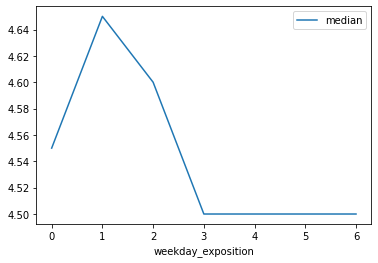

In [57]:
#Даты размещения

#День размещения 

pivot_table_weekday_exposition = df.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

**Промежуточный вывод**

Самые дорогие квартиры выставляются во вторник, а вот самые дешевые с четверга. 

,mean,count,median
month_exposition,,,
4,5.500050,2303,4.700
9,5.531227,1916,4.600
11,5.423031,2281,4.600
12,5.365143,1573,4.600
2,5.311487,2536,4.550
3,5.347556,2499,4.550
1,5.329954,1426,4.500
7,5.348122,1621,4.500
8,5.384412,1687,4.500


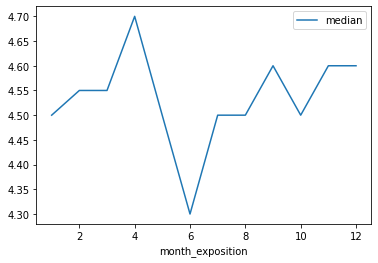

In [58]:
#Даты размещения

#Месяц размещения 

pivot_table_month_exposition = df.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

**Промежуточный вывод**

Самые дорогие квартиры появляются на рынке в апреле, а самые дешевые в июне. Интересно было бы узнать, с чем связано такое крутое падение с апреля по июнь. Возможно, это говорит о некой сезонности на рынке недвижимости. 

,mean,count,median
year_exposition,,,
2014,7.956036,116,6.445
2015,6.082450,1095,5.100
2019,5.659160,2774,4.960
2018,5.229348,8286,4.500
2016,5.352590,2655,4.400
2017,5.279180,7893,4.400


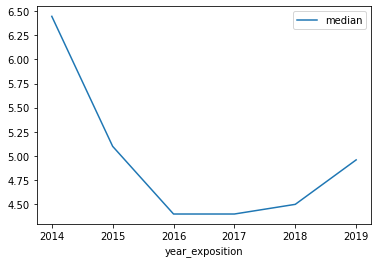

In [59]:
#Даты размещения 

#Год размещения

pivot_table_year_exposition = df.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

**Промежуточный вывод**

Видно, что с 2014 по 2016 цена квартир снижалась, а с 2018 начала немного расти. Возможно, в период с 2014 по 2016 на рынке появилось много предложений, что вынудило продавцов снижать цены. 

### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [60]:
locality_pivot_table = df.pivot_table(index = 'locality_name', values = 'price_to_m', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
print(locality_pivot_table)

                   count           mean
locality_name                          
Санкт-Петербург    14920  108756.648446
поселок Мурино       556   85681.762572
поселок Шушары       440   78677.364318
Всеволожск           397   67214.252620
Пушкин               358  101956.176844
Колпино              337   75333.295816
поселок Парголово    326   90332.262638
Гатчина              307   68746.146515
деревня Кудрово      299   92473.547559
Выборг               237   58141.909325


In [61]:
#Самая высокая стоимость квадратного метра 

locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,14920,108756.648446


In [62]:
#Самая низкая стоимость квадратного метра 

locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.909325


#### Средняя цена квартир в зависимости от удаления от центра Санкт-Петербурга 

/tmp/ipykernel_166/1598318135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city_centers_nearest'] = df['city_centers_nearest'].fillna(999999)
/tmp/ipykernel_166/1598318135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city_centers_nearest'] = df['city_centers_nearest'].astype('int')


,price_to_m
city_centers_nearest,
0,124958.455614
1,129520.755947
2,118117.309565
3,116263.261285
4,125854.176711
5,126094.231050
6,126624.115377
7,124148.338149
8,116693.569634


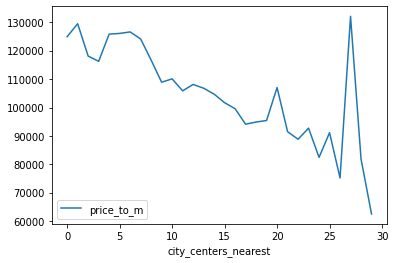

In [63]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(999999)
df['city_centers_nearest'] = df['city_centers_nearest'].astype('int')
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest !=999999').pivot_table(index = 'city_centers_nearest', values = 'price_to_m', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km


**Промежуточный вывод**

Общая тенденция такова, что чем дальше от центра города, тем дешевле квартиры. Тем не менее, на графике видны три пика - на 6 км, 20 км и на 27 км от центра. Это может говорить либо о том, что в этом радиусе спрос выше предложения, соответственно продавцы могут выставлять квартиры по более высокой цене, либо о том, что там есть какие-то другие факторы, которые влияют на стоимость. Особенно интересен в этом смысле 27 километр - там есть что-то такое, что даже перекрывает близость к центру.  

### Общий вывод

В этом исследовании я изучил данные о продаже квартир в Санкт-Петербурге за период с конца ноября 2014 года по май 2019 года. Определил и обработал пропущенные значения там, где это было возможно, привел тип данных к нужному формату и избавился от дубликатов. Поработал с редкими и выбивающимися значениями. 

Основываясь на проанализированных данных можно сделать следующие выводы о фирмировании цен на квартиры: 
- больше всего на стоимость влияет общий метраж, а также метраж кухни и жилой площади. Меньше всего из таких показателей влияет количество комнат в квартире. 
- этаж, на котором находится квартира, влияет на её стоимость. Квартиры на первом и последнем этажах стоят меньше, а самые дешевые на первом. 
- близость к центру также важна при формировании цены. Квартиры тем дешевле, чем они дальше от центра города. Хотя есть небольшие исключения, которые вызывают интерес, но, на общий тренд они не влияют. 
- время публикации не сильно влияет на скорость продажи. 
- в среднем квартиры продаются за 180 дней. Быстрой продажей можно считать ту, что произошла за 95 дней со дня публикации объявления. 

Также, нужно сказать, что с 2014 по 2016 цена квартир снижалась, а с 2018 начала немного расти, но на конец видимых данных в 2019 даже близко не приблизилась к точке паденения в 2014-м. Что вызвало такое падение цен мы не знаем, возможно избыточное предложение, а возможно другие экономические факторы. 

Точки роста: 
- данные о парках и прудах (ponds_nearest, parks_nearest). В этом исследовании эти данные нам не пригодились, однако них много пропусков, которые не позволили бы работать с ними. Посокльку эта информация заполняется автоматически из геосервисов, возможно где-то присутствует техническая ошибка, которая генерирует пропуски. 